# Breast Cancer Class Detection Using XGBOOST

# Import Libraries

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

In [59]:
df=pd.read_csv(r"C:\Users\DELL\OneDrive\Documents\CSV Files\BCancer.csv")

In [60]:
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


# Summarise the Dataset

In [61]:
df.columns

Index(['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [62]:
df=df.drop(['Sample code number'],axis=1)

In [63]:
df.isnull().any()

Clump Thickness                False
Uniformity of Cell Size        False
Uniformity of Cell Shape       False
Marginal Adhesion              False
Single Epithelial Cell Size    False
Bare Nuclei                    False
Bland Chromatin                False
Normal Nucleoli                False
Mitoses                        False
Class                          False
dtype: bool

In [64]:
df=df.replace({'Class':2},np.NaN)
df=df.fillna({'Class':0})


In [65]:
df

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0.0
1,5,4,4,5,7,10,3,2,1,0.0
2,3,1,1,1,2,2,3,1,1,0.0
3,6,8,8,1,3,4,3,7,1,0.0
4,4,1,1,3,2,1,3,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2,1,1,1,0.0
679,2,1,1,1,2,1,1,1,1,0.0
680,5,10,10,3,7,3,8,10,2,4.0
681,4,8,6,4,3,4,10,6,1,4.0


In [66]:
df=df.replace({'Class':4},np.NaN)
df=df.fillna({'Class':1})
df


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0.0
1,5,4,4,5,7,10,3,2,1,0.0
2,3,1,1,1,2,2,3,1,1,0.0
3,6,8,8,1,3,4,3,7,1,0.0
4,4,1,1,3,2,1,3,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2,1,1,1,0.0
679,2,1,1,1,2,1,1,1,1,0.0
680,5,10,10,3,7,3,8,10,2,1.0
681,4,8,6,4,3,4,10,6,1,1.0


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump Thickness              683 non-null    int64  
 1   Uniformity of Cell Size      683 non-null    int64  
 2   Uniformity of Cell Shape     683 non-null    int64  
 3   Marginal Adhesion            683 non-null    int64  
 4   Single Epithelial Cell Size  683 non-null    int64  
 5   Bare Nuclei                  683 non-null    int64  
 6   Bland Chromatin              683 non-null    int64  
 7   Normal Nucleoli              683 non-null    int64  
 8   Mitoses                      683 non-null    int64  
 9   Class                        683 non-null    float64
dtypes: float64(1), int64(9)
memory usage: 53.5 KB


In [68]:
df.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,0.349927
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.477296
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


# Visuliaze the dataset

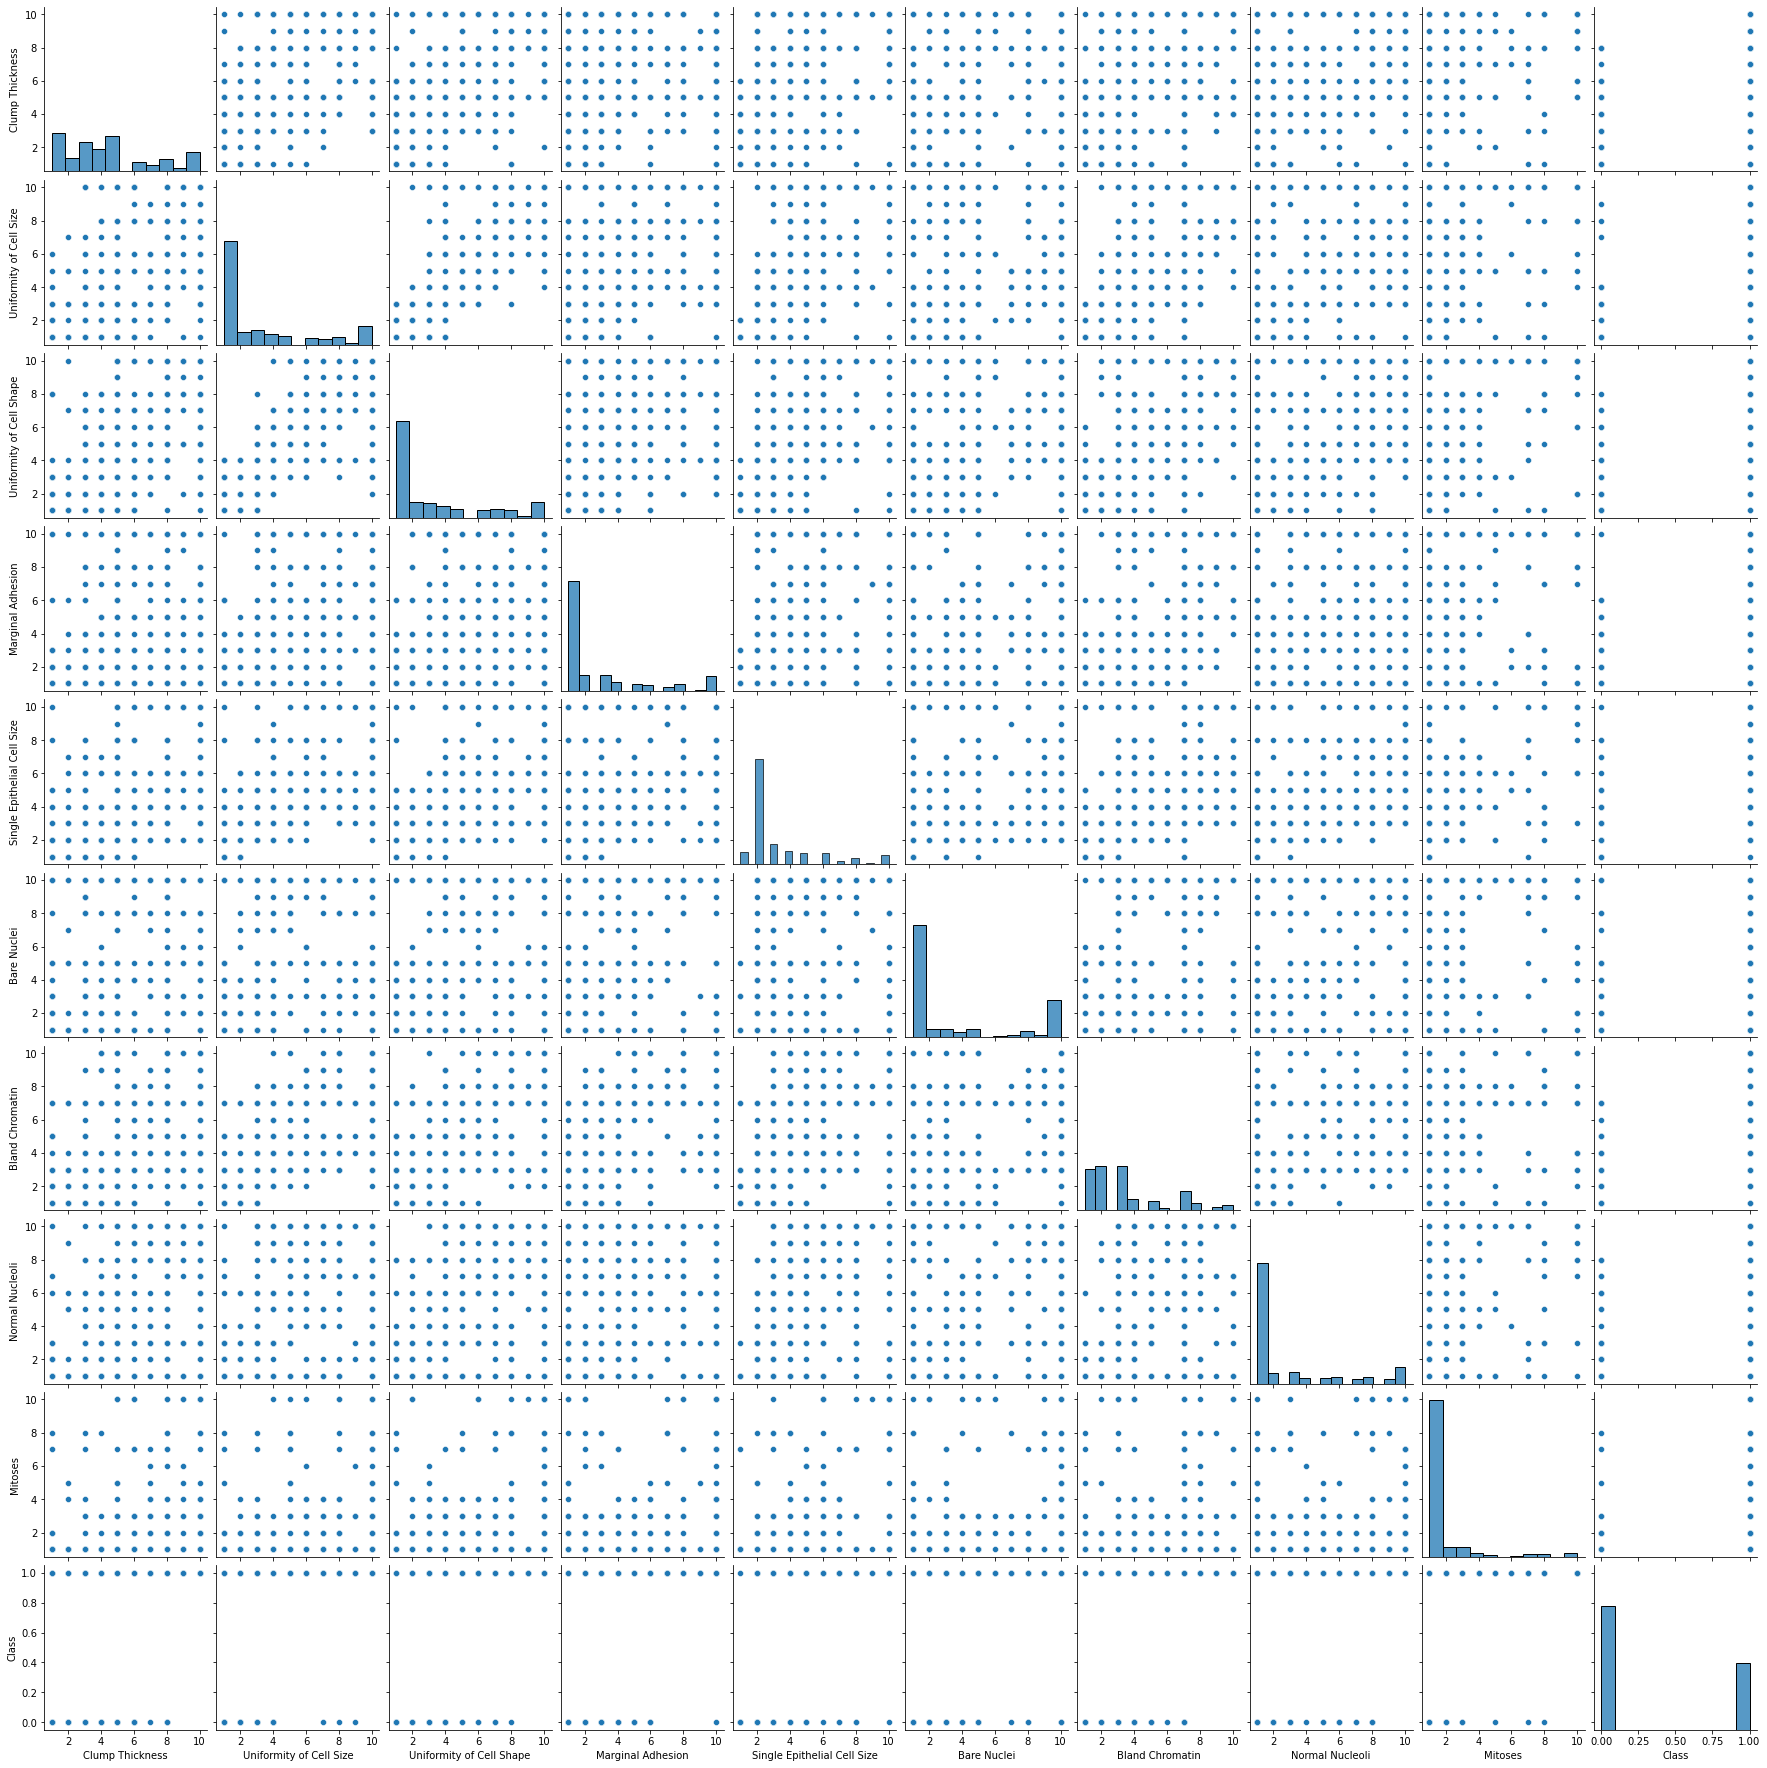

In [69]:
sns.pairplot(df)

<AxesSubplot:>

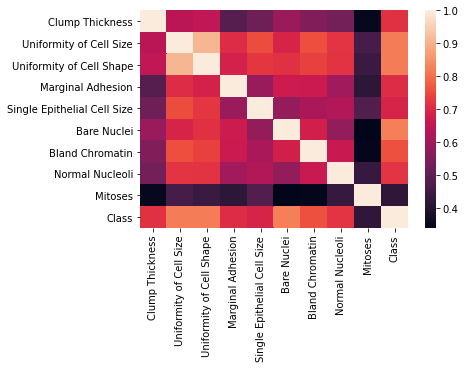

In [70]:
sns.heatmap(df.corr())

# Data Preparation

# Segregate the Data

In [71]:
df.columns

Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [72]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1].values

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,0,1,3,1,1,0
1,1002945,5,1,1,5,7,10,3,0,1,0
2,1015425,3,1,1,1,0,0,3,1,1,0
3,1016277,6,8,8,1,3,1,3,7,1,0
4,1017023,1,1,1,3,0,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,0,1,1,1,0
679,841769,0,1,1,1,0,1,1,1,1,0
680,888820,5,10,10,3,7,3,8,10,0,1
681,897471,1,8,6,1,3,1,10,6,1,1


# Train Test Split

In [73]:
from sklearn.model_selection import train_test_split



In [74]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [75]:
#pip install xgboost

In [76]:
from xgboost import XGBClassifier

In [77]:
model=XGBClassifier()
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [81]:
y_pred=model.predict(X_test)

# Model Validation

In [82]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [83]:
print("CONFUSION MATRIX :\n",confusion_matrix(y_test,y_pred))

CONFUSION MATRIX :
 [[84  3]
 [ 1 49]]


In [84]:
print("ACCURACY SCORE:\n",accuracy_score(y_test,y_pred))

ACCURACY SCORE:
 0.9708029197080292


In [86]:
print('CLASSIFICATION REPORT:\n',classification_report(y_test,y_pred))

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

         0.0       0.99      0.97      0.98        87
         1.0       0.94      0.98      0.96        50

    accuracy                           0.97       137
   macro avg       0.97      0.97      0.97       137
weighted avg       0.97      0.97      0.97       137



# Cross Validation

In [88]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [91]:
kfold=StratifiedKFold(n_splits=10)
cv_result=cross_val_score(model,X_train,y_train,cv=kfold,scoring='accuracy')
result=cv_result.mean()
print('CROSS VALIDATION SCORE',result*100,'%')

CROSS VALIDATION SCORE 96.88888888888889 %
